# 0.0 Imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import gridspec
from IPython.display import Image
from IPython.core.display import HTML

import scipy
from scipy import stats

import sklearn
from sklearn.linear_model import LinearRegression

import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import statsmodels.api as sm

# 0.1 Funções de auxílio

In [2]:
#ajusta graficos
def jupyter_settings():
    %matplotlib inline
    %pylab inline
    
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24
    
    display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    
    sns.set()

jupyter_settings()

Populating the interactive namespace from numpy and matplotlib


In [3]:
plt.rc('xtick',labelsize=15)
plt.rc('ytick',labelsize=15)
plt.rc('axes' ,labelsize=18)

# Capítulo 2 - Análise de regressão com duas variáveis: algumas ideias básicas

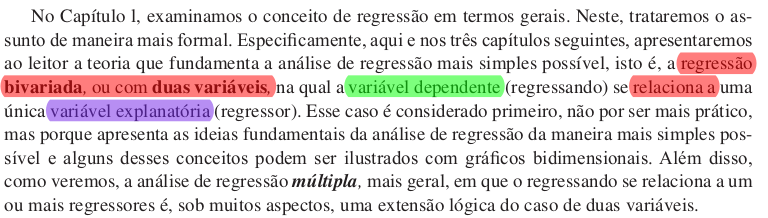

In [81]:
Image( '/home/deivison/Documentos/projetos/econometria/imagens/cap_02_intro.png')

# Função de Regressão Populacional - FRP

## Tabela 2.1 Renda Familiar x Despesas semanais - População 60 Famílias

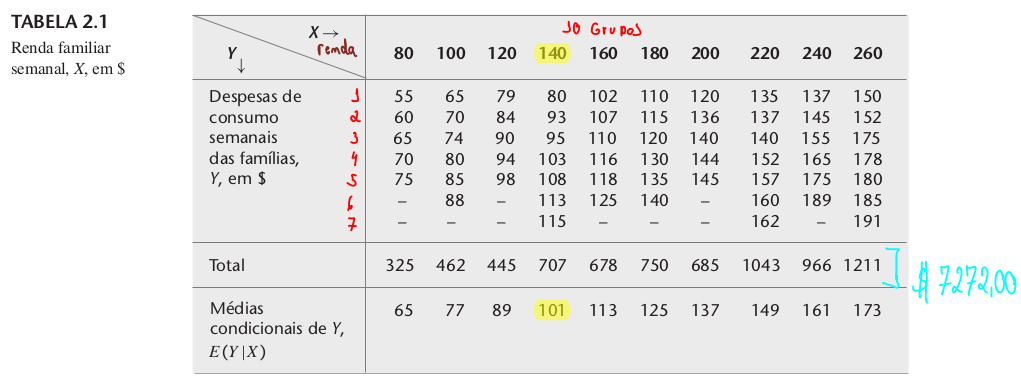

In [4]:
Image( '/home/deivison/Documentos/projetos/econometria/imagens/tabela_2.1.png')

In [20]:
data = pd.read_excel("/home/deivison/Documentos/projetos/econometria/datasets/tabela_2.1.xlsx")
data = pd.DataFrame(data)
data.head(10)

,renda,despesa
0,80,55
1,80,60
2,80,65
3,80,70
4,80,75
5,100,65
6,100,70
7,100,74
8,100,80
9,100,85


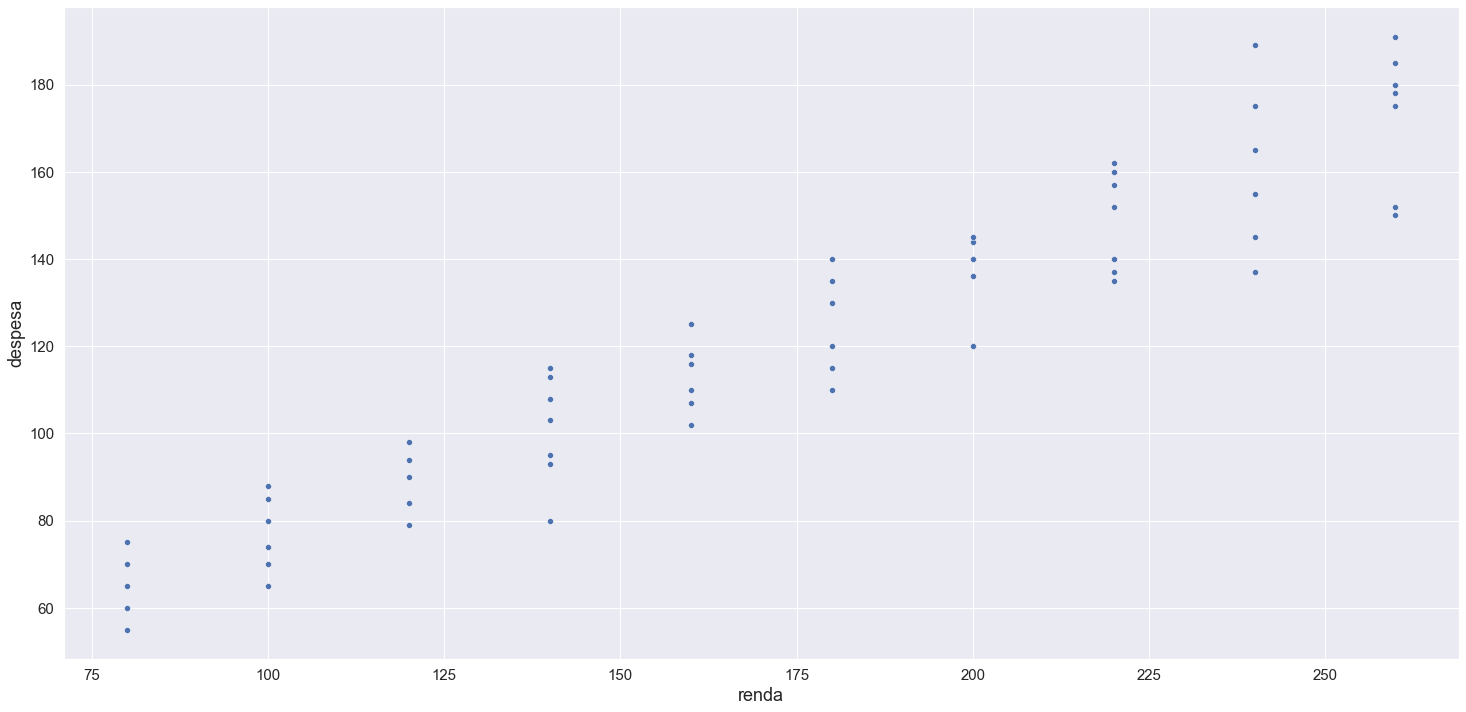

In [16]:
# Grafico de Dispersao renda x despesas das 60 familias
sns.scatterplot(data = data, x = 'renda', y = 'despesa' );

In [26]:
# Medias despesas por categorias de renda
data_media = pd.DataFrame()
data_media['renda'] = [80,100,120,140,160,180,200,220,240,260]
data_media['despesa_media'] = [65,77,89,101,113,125,137,149,161,173]
data_media

,renda,despesa_media
0,80,65
1,100,77
2,120,89
3,140,101
4,160,113
5,180,125
6,200,137
7,220,149
8,240,161
9,260,173


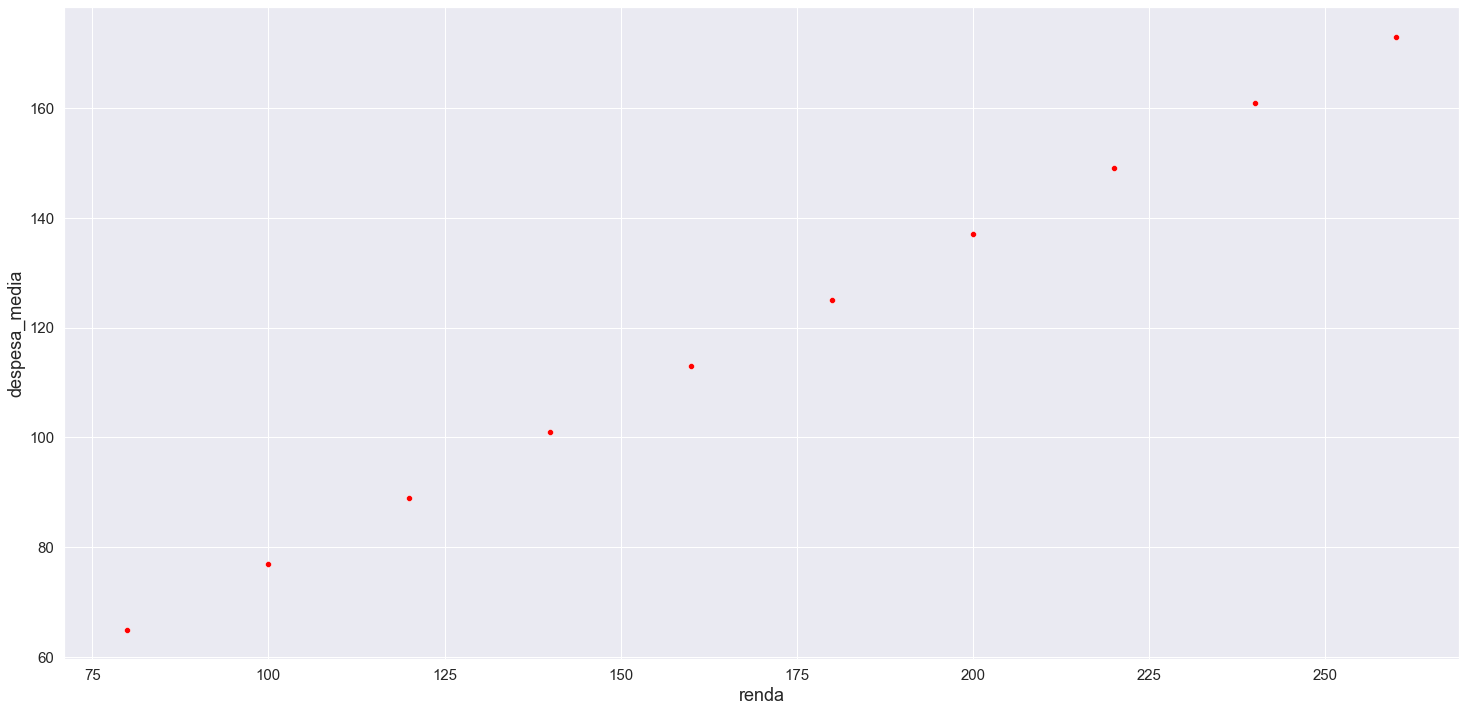

In [35]:
# Grafico dispersao - medias das despesas por categorias de renda
sns.scatterplot(data = data_media, x = 'renda', y = 'despesa_media', color = 'red'  );

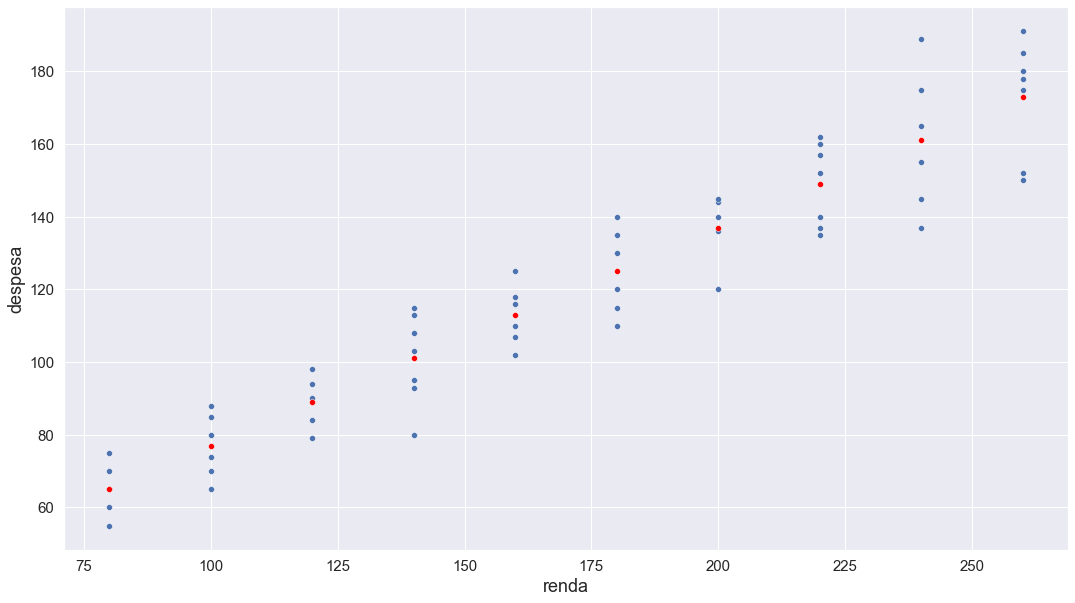

In [36]:
# grafico dispersao com os pontos medios das despesas por categoria de renda
fig = plt.figure( figsize = (18,10 ) )
specs = gridspec.GridSpec( nrows = 1, ncols = 1, figure = fig )

ax1 = fig.add_subplot( specs[0,0])

# dispersao populacao
sns.scatterplot(data = data, x = 'renda', y = 'despesa', ax = ax1 );

# pontos medios por categoria
sns.scatterplot(data = data_media, x = 'renda', y = 'despesa_media', color = 'red', ax = ax1 );


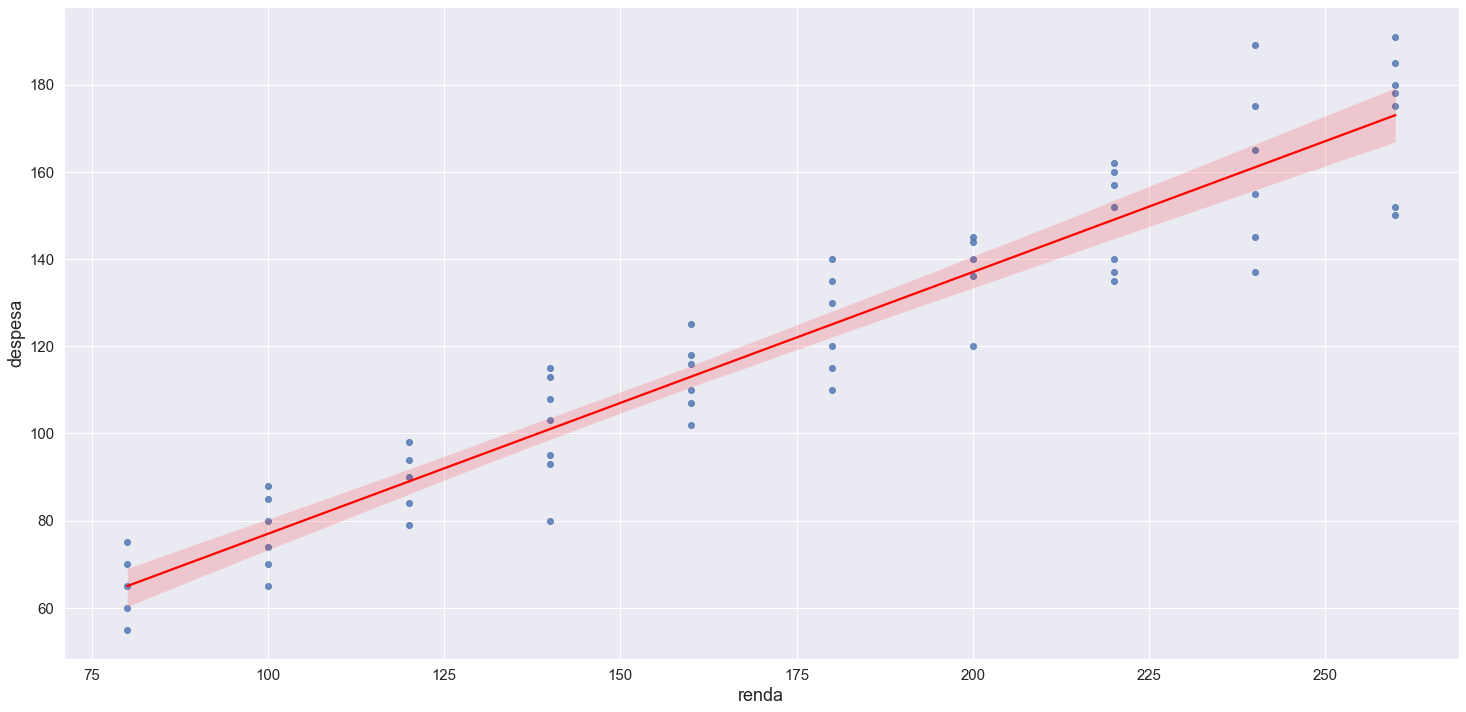

In [18]:
sns.regplot(data = data, x = 'renda', y = 'despesa', line_kws={"color": "red"} );

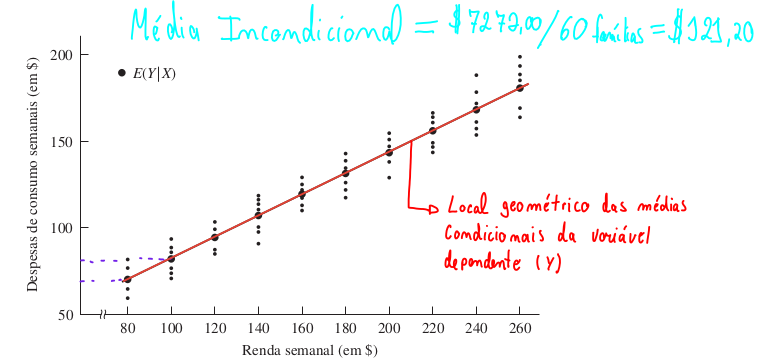

In [21]:
Image( '/home/deivison/Documentos/projetos/econometria/imagens/local_geometrico.png')

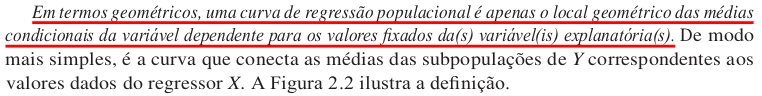

In [23]:
Image( '/home/deivison/Documentos/projetos/econometria/imagens/local_geometrico_2.png')

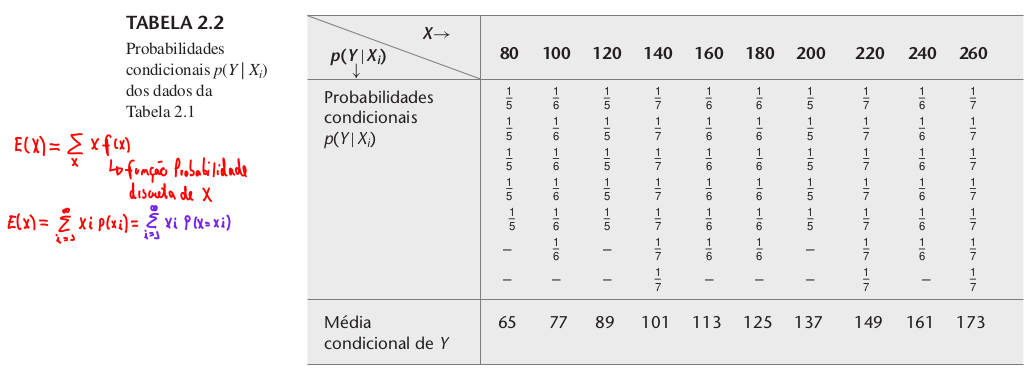

In [22]:
# Probabilidades condicionais
Image( '/home/deivison/Documentos/projetos/econometria/imagens/prob_cond.png')

Cada despesa por categoria de renda só ocorre uma única vez  
Por isso, a média condicional corresponde a média aritmética

# 2.4 Especificação Estocástica da FRP

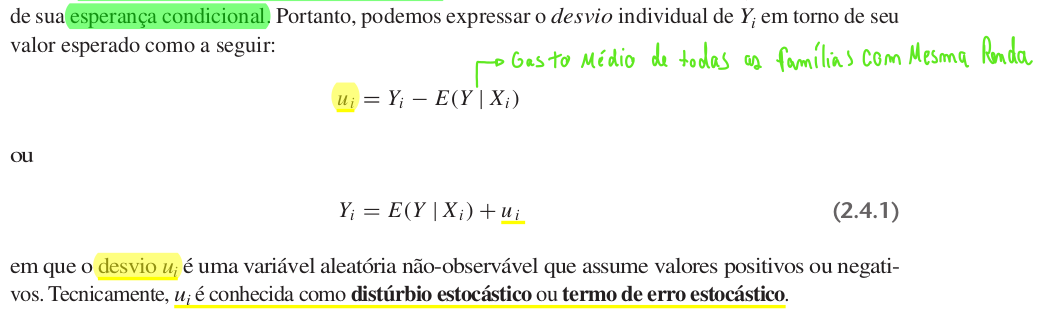

In [43]:
Image( '/home/deivison/Documentos/projetos/econometria/imagens/erro_estocastico_1.png')

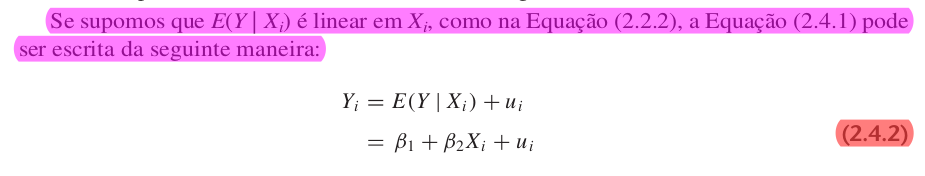

In [46]:
Image( '/home/deivison/Documentos/projetos/econometria/imagens/erro_estocastico_2.png')

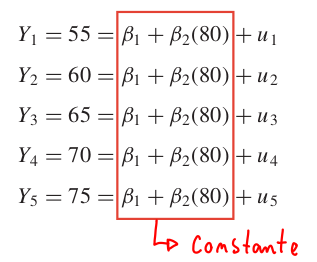

In [47]:
Image( '/home/deivison/Documentos/projetos/econometria/imagens/erro_estocastico_3.png')

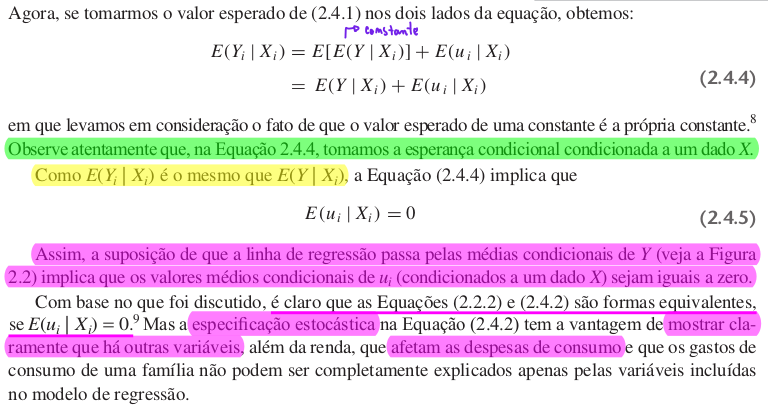

In [49]:
Image( '/home/deivison/Documentos/projetos/econometria/imagens/erro_estocastico_5.png')

# 2.4 Função de Regressão Amostral - FRA

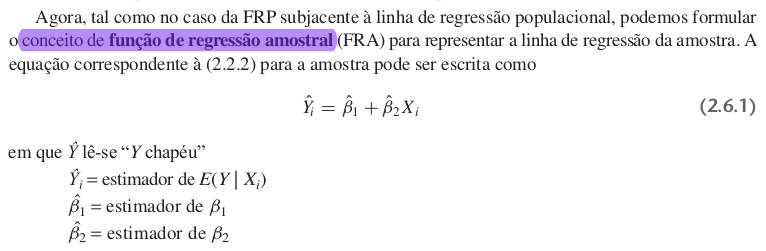

In [50]:
Image( '/home/deivison/Documentos/projetos/econometria/imagens/fra_1.png')

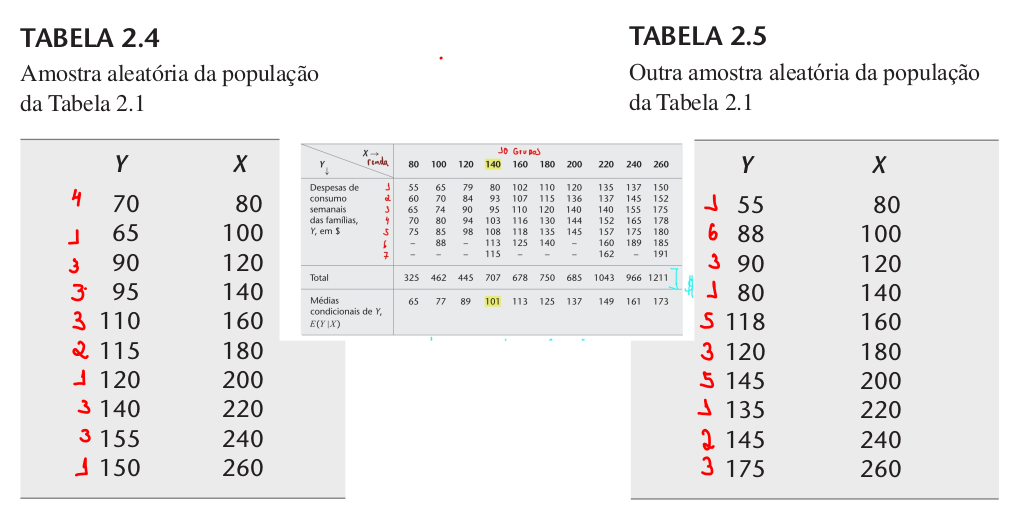

In [51]:
# duas amostras com 10 familias obtidas da população ( 60 familias )
Image( '/home/deivison/Documentos/projetos/econometria/imagens/fra_2.png')

## Amostra 1 

In [52]:
amostra_1 = pd.DataFrame()
amostra_1['renda']   = [80,100,120,140,160,180,200,220,240,260]
amostra_1['despesa'] = [70,65,90,95,110,115,120,140,155,150]

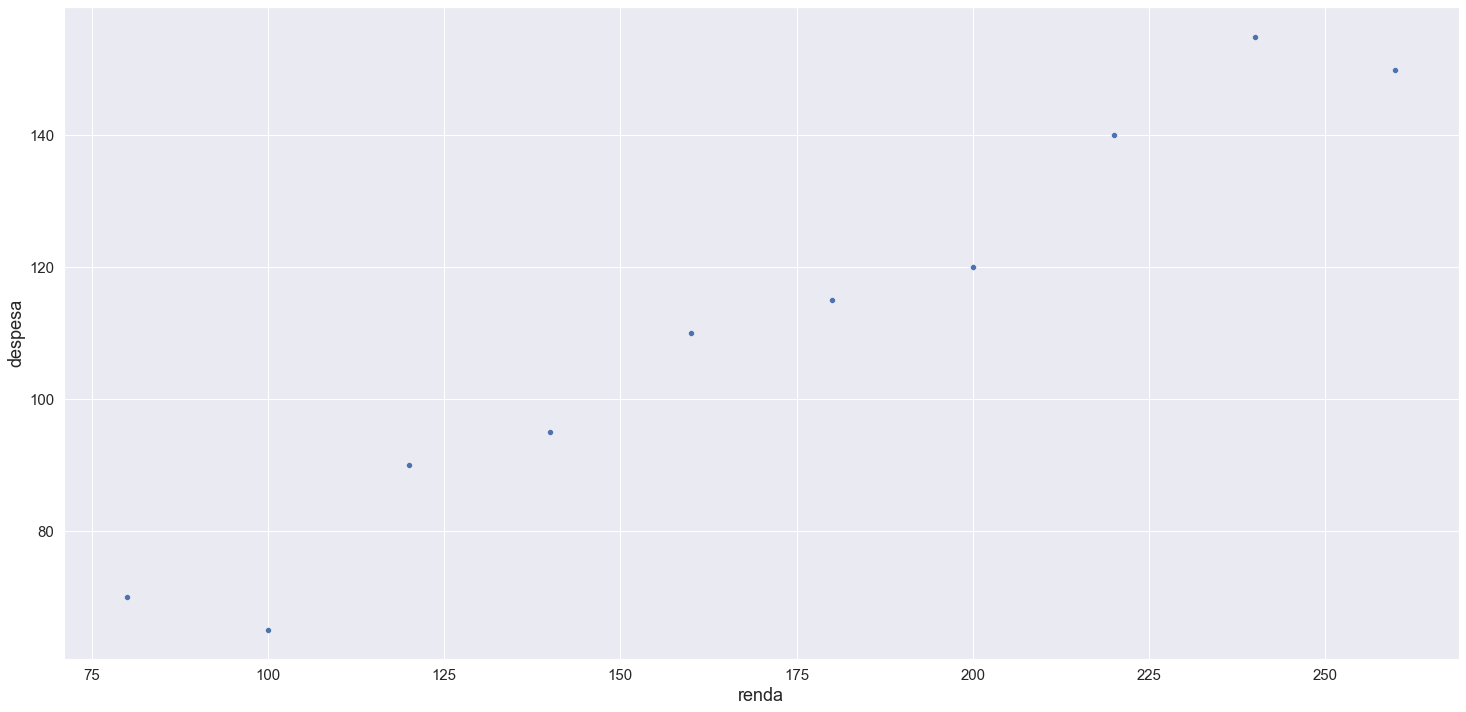

In [64]:
# grafico dispersao amostra 1
sns.scatterplot(data = amostra_1, x = 'renda', y = 'despesa');

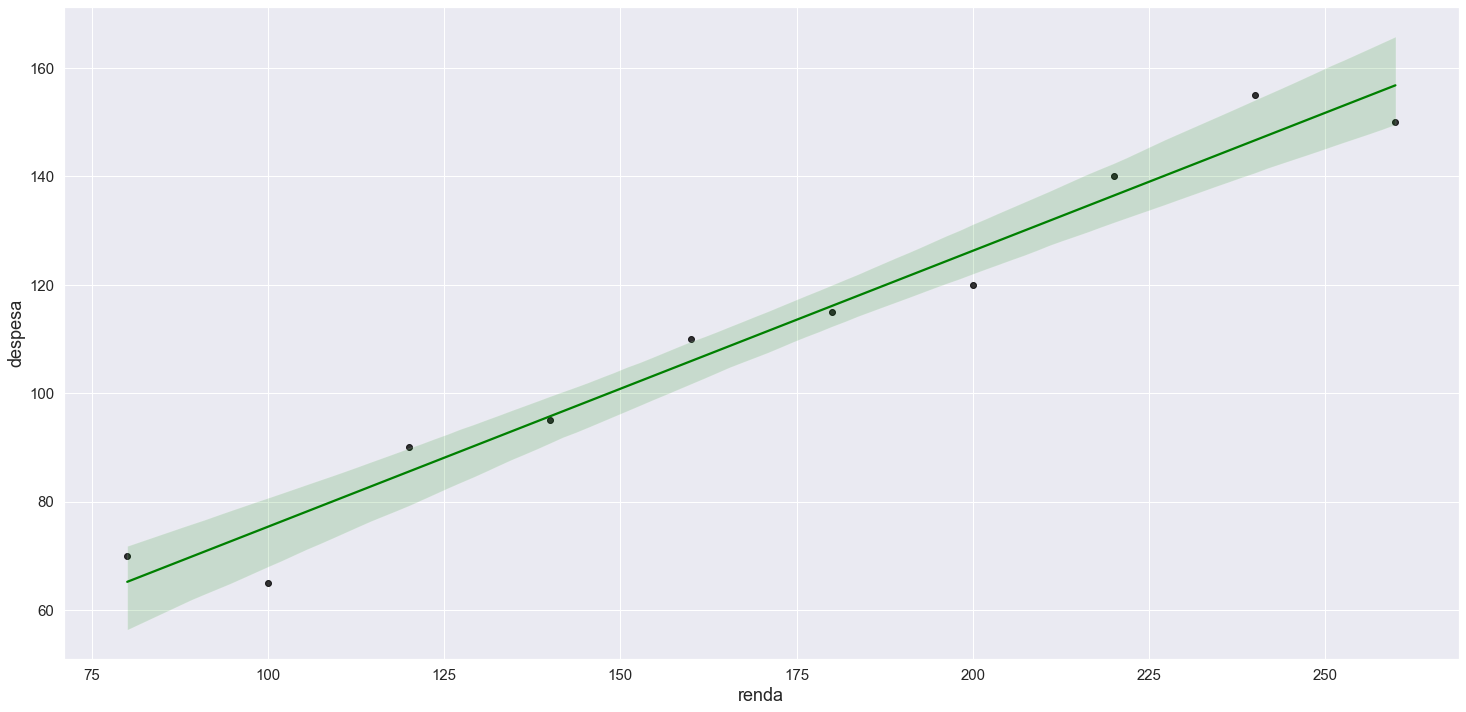

In [71]:
# Regressao amostral - amostra 1
sns.regplot(data = amostra_1, x = 'renda', y = 'despesa', color = 'black', line_kws={"color": "green"});

## Amostra 2

In [55]:
amostra_2 = pd.DataFrame()
amostra_2['renda']   = [80,100,120,140,160,180,200,220,240,260]
amostra_2['despesa'] = [55,88,90,80,118,120,145,135,145,175]

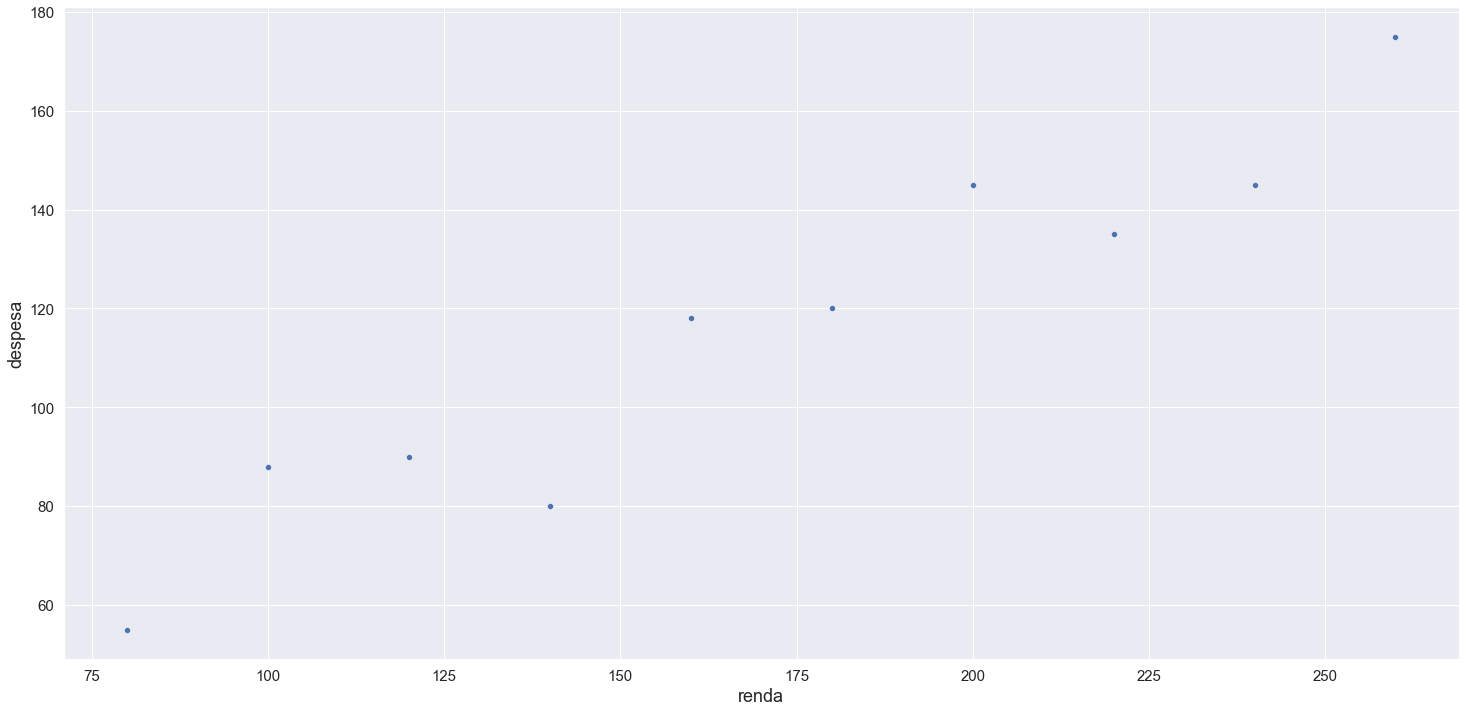

In [61]:
# grafico dispersao amostra 2
sns.scatterplot(data = amostra_2, x = 'renda', y = 'despesa');

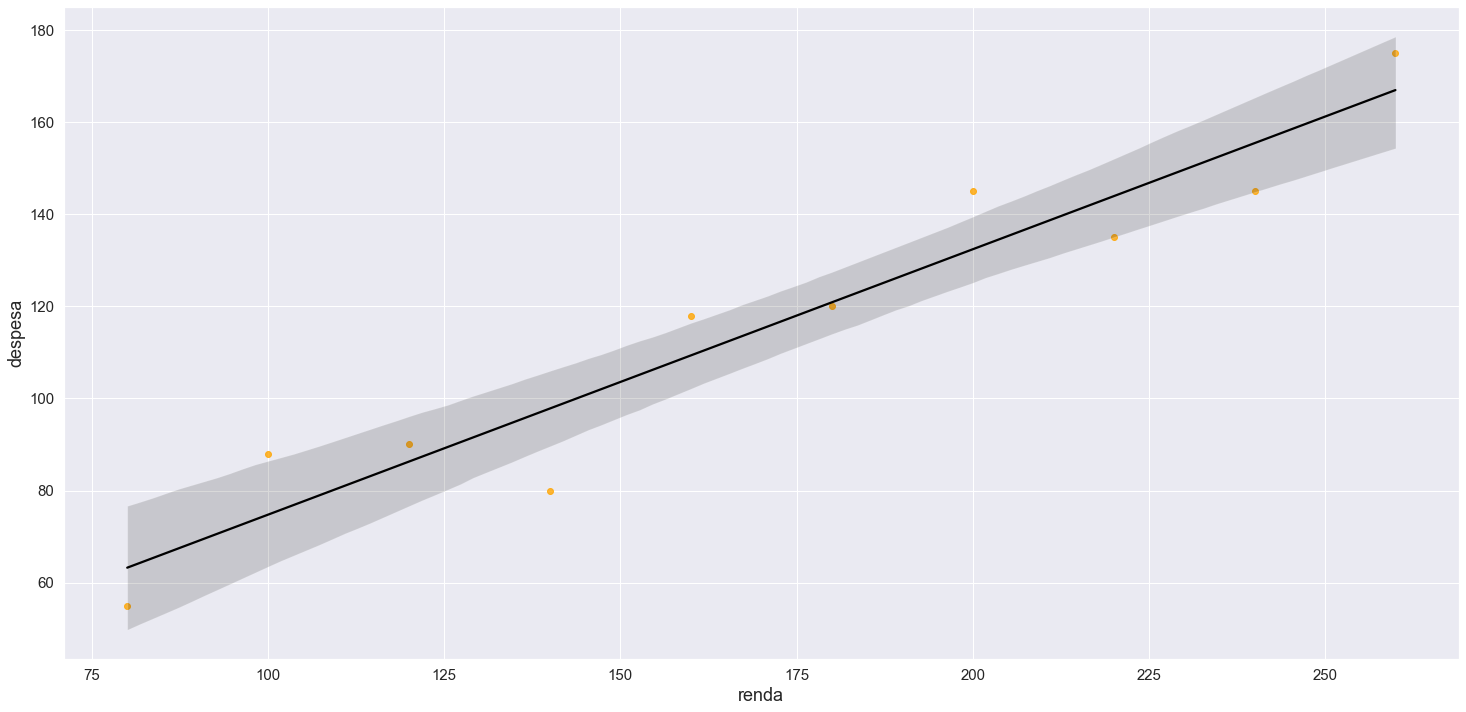

In [73]:
# regressao amostral - amostra 2
sns.regplot(data = amostra_2, x = 'renda', y = 'despesa', color = 'orange', line_kws={"color": "black"});

## Regressão Populacional

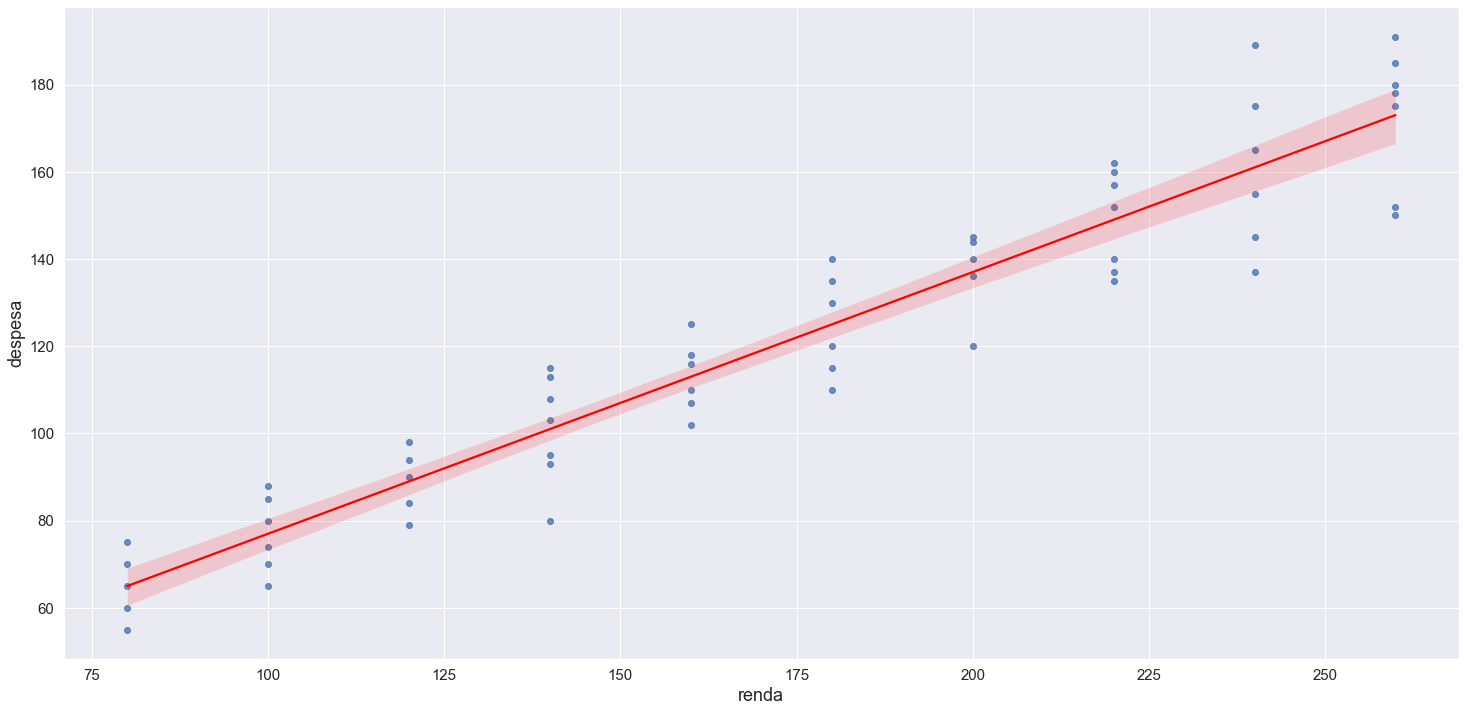

In [65]:
sns.regplot(data = data, x = 'renda', y = 'despesa', line_kws={"color": "red"} );

## Objetivo Primordial na Análise de Regressão 

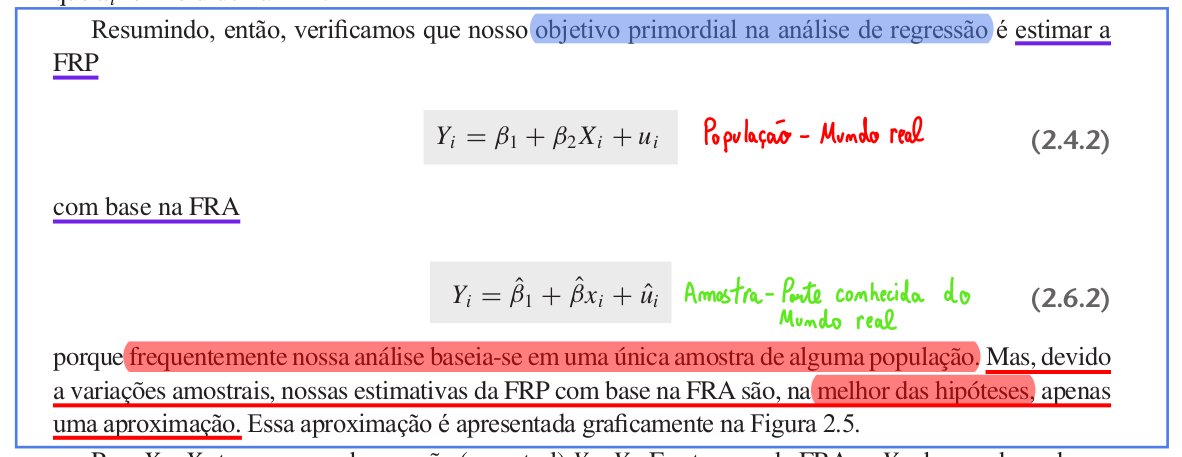

In [66]:
Image( '/home/deivison/Documentos/projetos/econometria/imagens/fra_3.png')

### Aproximação FRA amostra 1 com relação a FRP

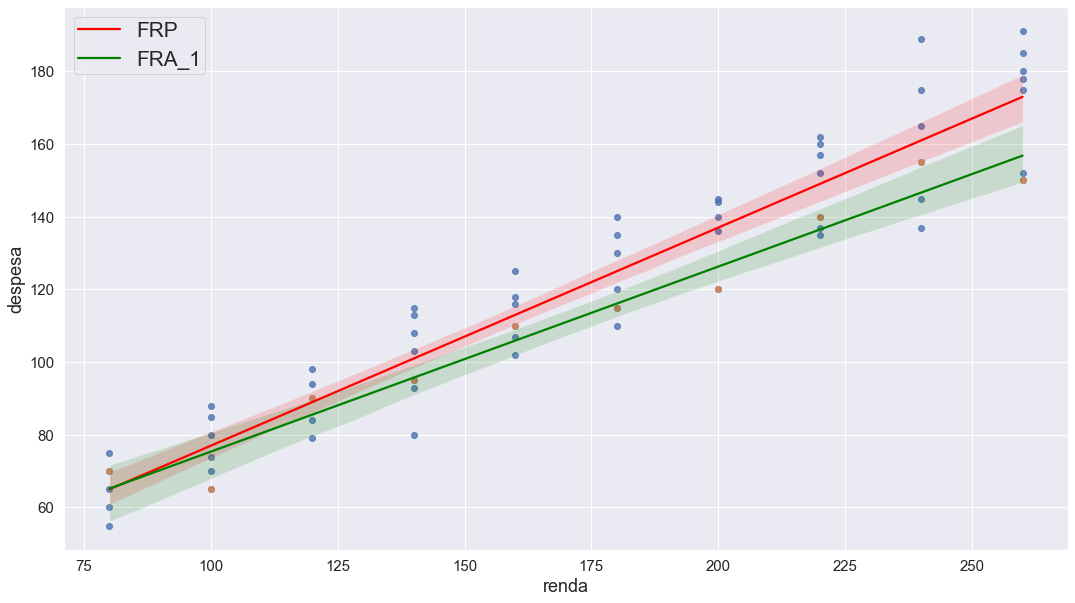

In [106]:
fig   = plt.figure( figsize = (18,10) )
specs = gridspec.GridSpec( nrows = 1, ncols = 1, figure = fig )

ax1 = fig.add_subplot( specs[0,0] )

#Regressao polulacional
sns.regplot(data = data, x = 'renda', y = 'despesa', line_kws={"color": "red", "label":"FRP"}, ax = ax1 );


#regressao amostral 1
sns.regplot(data = amostra_1, x = 'renda', y = 'despesa', line_kws={"color": "green","label":"FRA_1"}, ax = ax1);

ax1.legend(loc= 'upper left', borderpad = 0.2, fontsize = 'xx-large');

### Aproximação FRA amostra 2 com relação a FRP

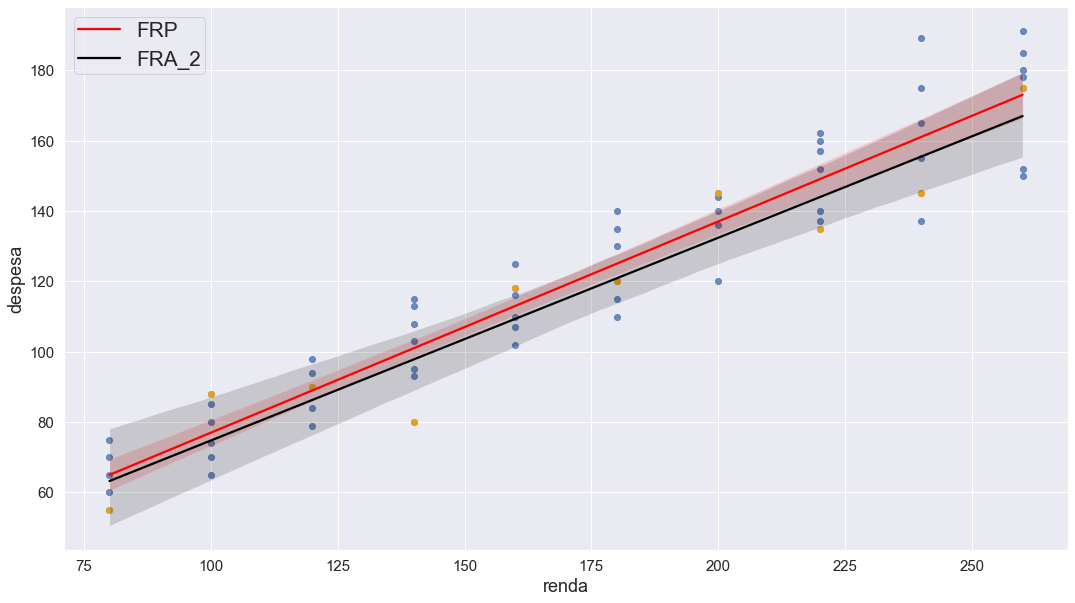

In [107]:
fig   = plt.figure( figsize = (18,10) )
specs = gridspec.GridSpec( nrows = 1, ncols = 1, figure = fig )

ax1 = fig.add_subplot( specs[0,0] )

#Regressao polulacional
sns.regplot(data = data, x = 'renda', y = 'despesa', line_kws={"color": "red","label":"FRP"}, ax = ax1 );

#regressao amostral 2
sns.regplot(data = amostra_2, x = 'renda', y = 'despesa', color = 'orange', line_kws={"color": "black","label":"FRA_2"}, ax = ax1);

ax1.legend(loc= 'upper left', borderpad = 0.2, fontsize = 'xx-large');

### Aproximações FRA Amostra 1 - FRA Amostra 2 - FRP

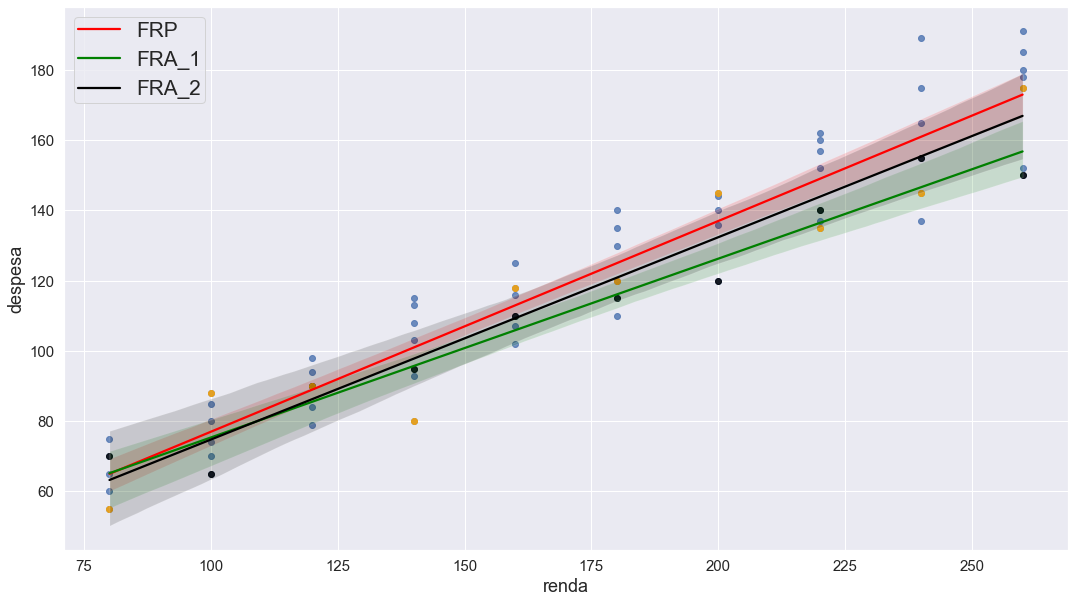

In [108]:
fig   = plt.figure( figsize = (18,10) )
specs = gridspec.GridSpec( nrows = 1, ncols = 1, figure = fig )

ax1 = fig.add_subplot( specs[0,0] )

#Regressao polulacional
sns.regplot(data = data, x = 'renda', y = 'despesa', line_kws={"color": "red", "label":"FRP"}, ax = ax1 );

#regressao amostral 1
sns.regplot(data = amostra_1, x = 'renda', y = 'despesa', color = 'black', line_kws={"color": "green","label":"FRA_1"}, ax = ax1);

#regressao amostral 2
sns.regplot(data = amostra_2, x = 'renda', y = 'despesa', color = 'orange', line_kws={"color": "black", "label":"FRA_2"}, ax = ax1);

ax1.legend(loc= 'upper left', borderpad = 0.2, fontsize = 'xx-large');


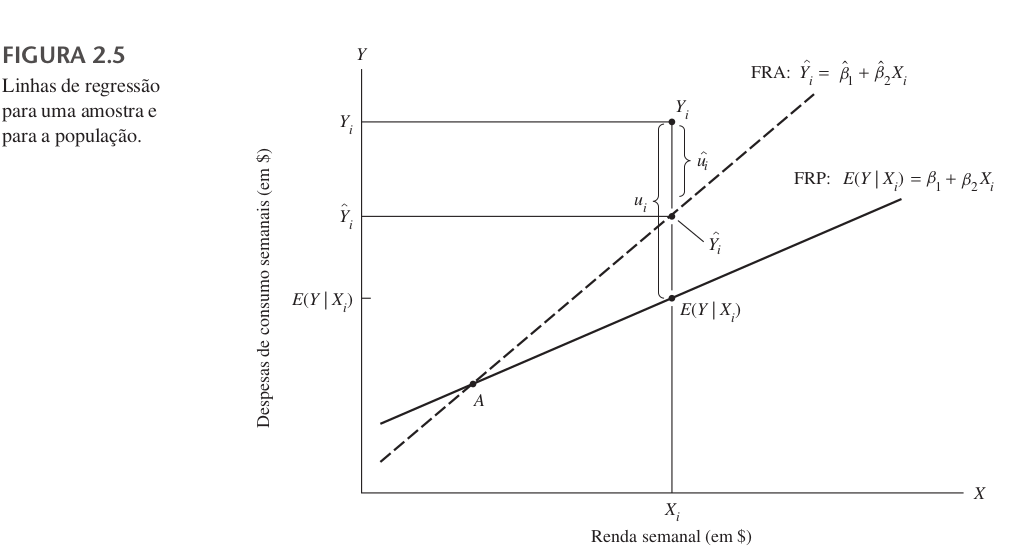

In [77]:
Image( '/home/deivison/Documentos/projetos/econometria/imagens/fra_4.png')

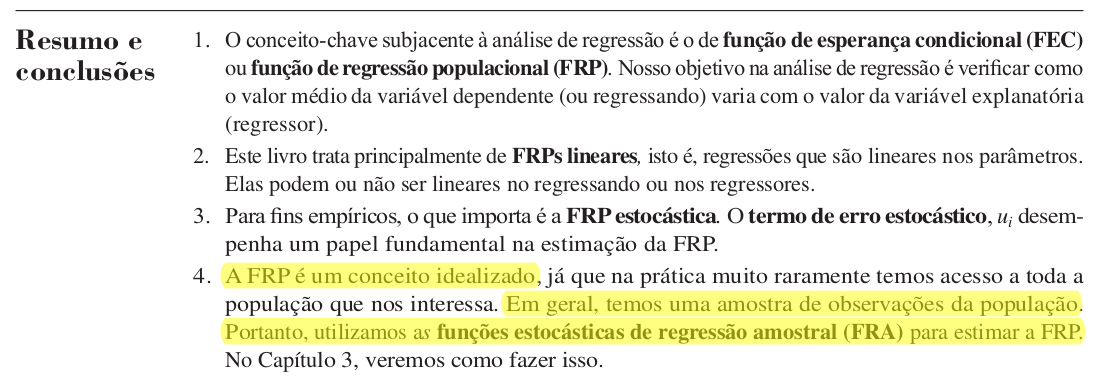

In [78]:
Image( '/home/deivison/Documentos/projetos/econometria/imagens/cap_02_resumo.png')